# EDA

This notebook performs the Exploratory Data Analysis (EDA) to understand the main characteristics of the dataset before transformations and modeling. 

It examines both categorical and numerical variables through descriptive statistics and visualizations, helping to detect patterns, trends, and potential data issues. 

The goal is to gain a clear understanding of the dataset’s behavior and prepare insights that will guide the following preprocessing and feature engineering stages.

## IMPORT LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Autocomplete
%config IPCompleter.greedy=True

## IMPORT DATASETS

In [10]:
WORK_PATH = '/Users/rober/cmapss-rul-prediction/02_Data/03_Working/'

df_work = pd.read_pickle(f"{WORK_PATH}df_work_data_quality.pickle")
cat = pd.read_pickle(f"{WORK_PATH}cat_data_quality.pickle")
num = pd.read_pickle(f"{WORK_PATH}num_data_quality.pickle")

## EDA CATEGORICAL

_unit_number_ is not a feature. It's an identifier, not a predictor.

It should not be used for modeling.

It’s used for grouping or time series slicing, e.g., per-unit analysis like degradation over cycles.

## EDA NUMERICAL

### Statistical analysis

In [21]:
def statistics(num):
    #describe
    statistics = num.describe().T
    #add median
    statistics['median'] = num.median()
    #reorder to put the median next to mean
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistics)

In [22]:
statistics(num)

,count,mean,median,std,min,25%,50%,75%,max
time_in_cycles,14507.0,109.819260,104.0000,70.367340,1.0000,52.0000,104.0000,157.0000,362.0000
op_setting_1,14507.0,-0.000006,-0.0000,0.002190,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,14507.0,0.000002,0.0000,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
sensor_2,14507.0,642.673648,642.6300,0.496075,641.2100,642.3300,642.6300,642.9900,644.5300
sensor_3,14507.0,1590.457907,1590.0000,6.084195,1571.0600,1586.3000,1590.0000,1594.2650,1616.9100
sensor_4,14507.0,1408.811139,1407.7900,8.970677,1385.1900,1402.3400,1407.7900,1414.3300,1441.4900
sensor_6,14507.0,21.609808,21.6100,0.001373,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_7,14507.0,553.382222,553.4700,0.877510,549.8500,552.8400,553.4700,554.0100,556.0600
sensor_8,14507.0,2388.095508,2388.0900,0.071051,2387.9000,2388.0400,2388.0900,2388.1400,2388.5600
sensor_9,14507.0,9065.438290,9061.0800,22.564435,9021.7300,9053.4200,9061.0800,9069.3300,9244.5900


CONCLUSIONS

⚠️**Perfectly aligned distributions**

- **sensor_2, sensor_3, sensor_4,  sensor_7, sensor_8, sensor_11, sensor_12, sensor_13, sensor_14, sensor_15. sensor_15, sensor_17, sensor_20, sensor_21**
    - mean ≈ median ≈ 25%, 50%, 75%
    - Suggests very symmetrical or flat distribution

⚠️**Constant or quasi-constant variables**
- **sensor_6**
    - mean = median = min = max = 21.6100
    - std = 0.001373 (almost no variation)
    - Drop or at least flag to investigate
    
⚠️**Suspiciously narrow ranges**. Suggests sensors are very stable, maybe too stable — worth plotting or investigating for data logging issues.
- **sensor_13, sensor_8, sensor_14**
    - Tiny ranges (e.g., min = 2387.88, max = 2388.56 for sensor_13) 
    - Suggests sensors are very stable, maybe too stable — worth plotting or investigating for data logging issues.

⚠️**High variance**

- **sensor_9**
    - std = 22.56, range ~200+
    - ✅ Already visually investigated — showed real trends. Healthy amount of variation. Could be informative for prediction.

### Plots

In [26]:
def plot_eda_continuous(num):
    
    #calculate row number
    from math import ceil
    rows = ceil(num.shape[1] / 2)

    #define plot dimensions
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #flat to iterate on the plot as it was 1 dimension instead of 2
    ax = ax.flat 

    #create the loop that adds each plot
    for each, variable in enumerate(num):
        num[variable].plot.density(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

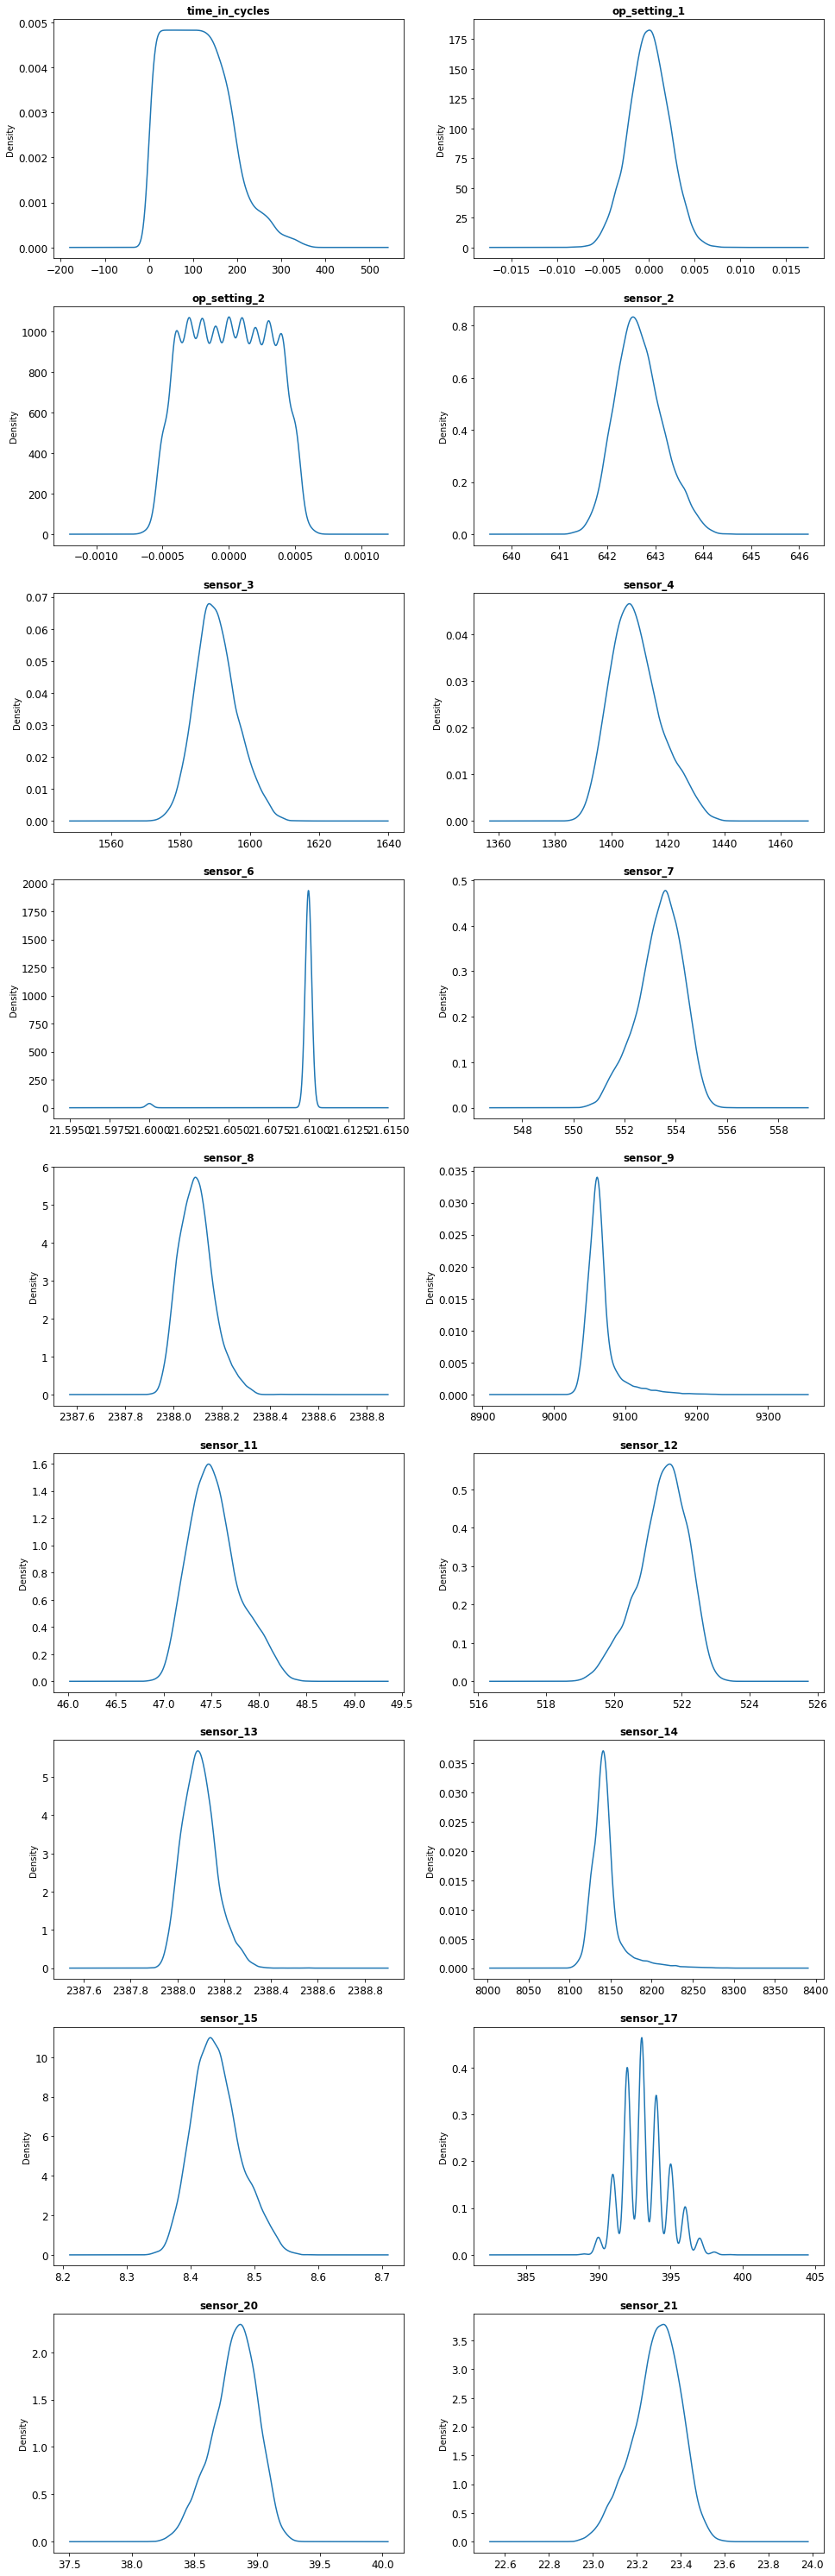

In [24]:
plot_eda_continuous(num)

CONCLUSIONS

⚠️ **Flat or extremely narrow distributions (low variance)**:
- **sensor_6, op_setting_1, op_setting_2**: almost constant or near-constant. Likely not informative.
- **➤ Action: Flag for potential removal unless they’re critical domain-wise... or just drop them**

🔍 **Multimodal patterns** (potential operational modes):
- **sensor_17** (clearly multimodal), and perhaps **op_setting_2** show multiple peaks.
- **➤ Action: Might require mode separation (e.g., clustering) or further investigation. Could reflect different regimes or engine types.**

✅ **Clean bell curves**:
- **sensor_2, sensor_3, sensor_4, sensor_11...** look well-behaved and normally distributed.
- **➤ Action: Good candidates for standard scaling and modeling.**

🔍 **Skewed or asymmetric distributions**:
- **sensor_14** is right-skewed, **sensor_9** has long tails.
- **➤ Action: Consider transformations depending on correlation with target.**

## SAVE DATASETS AFTER EDA

We haven't changed anything, but we'll follow the path saving the archives with the sufix _eda just to flag we already finished EDA phase.

In [27]:
PATH_DF_WORK  = WORK_PATH + 'df_work_eda.pickle'
PATH_CAT = WORK_PATH + 'cat_eda.pickle'
PATH_NUM = WORK_PATH + 'num_eda.pickle'

In [28]:
df_work.to_pickle(PATH_DF_WORK)
cat.to_pickle(PATH_CAT)
num.to_pickle(PATH_NUM)